# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:/Users/HSIU/Desktop/機器學習 百日馬拉松/data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

### hw-1 使用等寬劃分進行繪圖

In [5]:
app_train['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [6]:
# 新增欄位 "equal_width_age", 對年齡做等寬劃分
app_train['equal_AMT_INCOME'] = pd.cut(app_train['AMT_INCOME_TOTAL'], 10)

In [10]:
# 觀察等寬劃分下, 每個種組距各出現幾次
app_train['equal_AMT_INCOME'].value_counts().sort_index() # 每個 bin 的值的範圍大小都是一樣的

(-91324.35, 11723085.0]       307508
(11723085.0, 23420520.0]           2
(23420520.0, 35117955.0]           0
(35117955.0, 46815390.0]           0
(46815390.0, 58512825.0]           0
(58512825.0, 70210260.0]           0
(70210260.0, 81907695.0]           0
(81907695.0, 93605130.0]           0
(93605130.0, 105302565.0]          0
(105302565.0, 117000000.0]         1
Name: equal_AMT_INCOME, dtype: int64

In [11]:
# 觀察上述資料, 出現明顯分群的離群值 (105302565.0, 117000000.0] 1, 為了避免在分等分的時候因為此離群值導致中間都沒有資料, 所以刪除此值
app_train2 = app_train[app_train['AMT_INCOME_TOTAL'] < 11723085.0]

In [16]:
app_train2['equal_AMT_INCOME'] = pd.cut(app_train2['AMT_INCOME_TOTAL'], 10)
amount_group_sorted = app_train2['equal_AMT_INCOME'].value_counts().sort_index() 

C:\Users\HSIU\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
##刪掉離群值
##怎麼使用groupby繪圖? 

In [20]:
import seaborn as sns
plt.style.use('ggplot')

In [17]:
# 計算每個年齡區間的 Target、AMT_INCOME_TOTAL與 AMT_INCOME_TOTAL 的平均值
amount_groups  =app_train2.groupby('equal_AMT_INCOME').mean()
amount_groups

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
equal_AMT_INCOME,,,,,,,,,,,,,,,,,,,,,
"(16675.65, 923085.0]",278177.909551,0.080753,0.095058,0.339786,0.693739,0.416961,1.671136e+05,5.985297e+05,27080.021777,5.379037e+05,...,0.000596,0.000508,0.000335,0.006401,0.006973,0.034374,0.267302,0.265484,1.900574,0.180198
"(923085.0, 1820520.0]",283489.061674,0.048458,0.268722,0.696035,0.594714,0.541850,1.252433e+06,1.159991e+06,57230.028634,1.090051e+06,...,0.000000,0.000000,0.000000,0.010204,0.030612,0.015306,0.336735,0.280612,1.234694,0.035242
"(1820520.0, 2717955.0]",270789.516129,0.064516,0.354839,0.677419,0.806452,0.419355,2.147230e+06,1.113367e+06,57420.145161,1.068097e+06,...,0.000000,0.000000,0.000000,0.000000,0.115385,0.000000,0.769231,0.115385,1.000000,0.096774
"(2717955.0, 3615390.0]",258893.285714,0.142857,0.142857,0.857143,0.714286,0.428571,3.311432e+06,1.131043e+06,72923.142857,1.092857e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,1.833333,0.000000
"(3615390.0, 4512825.0]",290271.666667,0.000000,0.166667,0.666667,0.500000,0.166667,4.295843e+06,1.201067e+06,93353.250000,1.168500e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.400000,0.000000,1.000000,0.000000
"(4512825.0, 5410260.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(5410260.0, 6307695.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(6307695.0, 7205130.0]",252084.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.750000e+06,7.908300e+05,52978.500000,6.750000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000
"(7205130.0, 8102565.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
amount_group_sorted

(16675.65, 923085.0]      307235
(923085.0, 1820520.0]        227
(1820520.0, 2717955.0]        31
(2717955.0, 3615390.0]         7
(3615390.0, 4512825.0]         6
(4512825.0, 5410260.0]         0
(5410260.0, 6307695.0]         0
(6307695.0, 7205130.0]         1
(7205130.0, 8102565.0]         0
(8102565.0, 9000000.0]         1
Name: equal_AMT_INCOME, dtype: int64

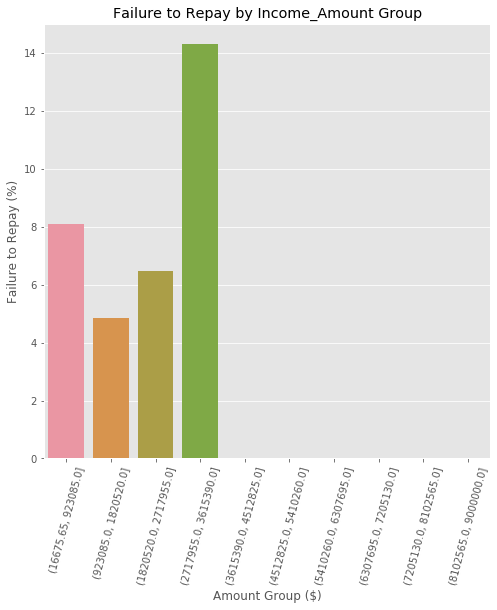

In [23]:
plt.figure(figsize = (8, 8))

# income_amount為 x, target 為 y 繪製 barplot

px = amount_groups.index.astype(str)
py = 100* amount_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Amount Group ($)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Income_Amount Group');

### HW-2 換使用等頻劃分進行資料的圖像化

In [35]:
# 新增欄位 "equal_freq_age", 對年齡做等頻劃分
app_train2["equal_freq_amount"] = pd.qcut(app_train2['AMT_INCOME_TOTAL'], [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

C:\Users\HSIU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
# 觀察等頻劃分下, 每個種組距各出現幾次
app_train2["equal_freq_amount"].value_counts() # 每個 bin 的資料筆數是一樣的

(112500.0, 135000.0]     48849
(180000.0, 225000.0]     44809
(99000.0, 112500.0]      36907
(25649.999, 81000.0]     33391
(147150.0, 162000.0]     31120
(162000.0, 180000.0]     30704
(81000.0, 99000.0]       30280
(270000.0, 9000000.0]    27158
(225000.0, 270000.0]     19957
(135000.0, 147150.0]      4333
Name: equal_freq_amount, dtype: int64

In [38]:
# 計算每個年齡區間的 Target、AMT_INCOME_TOTAL與 AMT_INCOME_TOTAL 的平均值
amount_groups_fre  =app_train2.groupby("equal_freq_amount").mean()
amount_groups_fre

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
equal_freq_amount,,,,,,,,,,,,,,,,,,,,,
"(25649.999, 81000.0]",277043.955886,0.081908,0.114432,0.176006,0.685754,0.375460,66254.124685,349964.649471,16708.066994,312117.900549,...,0.000299,0.000299,0.000270,0.005838,0.006471,0.032055,0.159830,0.223458,1.589714,0.374322
"(81000.0, 99000.0]",278577.382596,0.082232,0.121565,0.220178,0.688672,0.407629,91089.278813,428164.658620,19962.134058,381692.300318,...,0.000396,0.000627,0.000198,0.005292,0.006319,0.030806,0.193918,0.246682,1.737717,0.248283
"(99000.0, 112500.0]",278653.817975,0.087192,0.111063,0.262769,0.695478,0.407348,111333.276330,478992.017111,22144.588886,427010.102238,...,0.000488,0.000352,0.000244,0.006056,0.005928,0.032523,0.217053,0.256945,1.844276,0.199014
"(112500.0, 135000.0]",277726.641323,0.084894,0.096993,0.309239,0.690188,0.416262,131852.488657,540955.693914,24726.963858,483031.367268,...,0.000512,0.000532,0.000553,0.006512,0.006678,0.032726,0.248122,0.257510,1.903579,0.171918
"(135000.0, 147150.0]",277690.509116,0.090007,0.073621,0.307870,0.676437,0.378260,142953.056026,604463.525040,26519.573061,541242.533934,...,0.000231,0.000000,0.000231,0.007632,0.007105,0.036053,0.251053,0.268158,1.863947,0.209093
"(147150.0, 162000.0]",278409.153760,0.086407,0.083258,0.340874,0.700643,0.414428,157141.512098,601606.203808,27193.437673,537862.172433,...,0.000578,0.000578,0.000514,0.007209,0.007209,0.035787,0.267976,0.277502,1.976314,0.153406
"(162000.0, 180000.0]",278427.724205,0.084224,0.079957,0.395421,0.689617,0.431866,178061.632269,656241.048121,29460.009820,588952.447696,...,0.000521,0.000554,0.000554,0.006653,0.006727,0.035037,0.291422,0.283402,1.993532,0.129267
"(180000.0, 225000.0]",278415.224040,0.078065,0.079247,0.426142,0.700150,0.427347,212733.495347,721710.566705,32096.388497,650022.271966,...,0.000870,0.000580,0.000223,0.006613,0.007544,0.037441,0.312253,0.280545,2.028540,0.121873
"(225000.0, 270000.0]",278727.850529,0.070401,0.073258,0.467004,0.697800,0.431578,259491.085277,803444.348274,35445.282833,727113.804726,...,0.000852,0.000702,0.000200,0.006884,0.009937,0.038361,0.349747,0.288791,2.081774,0.104324


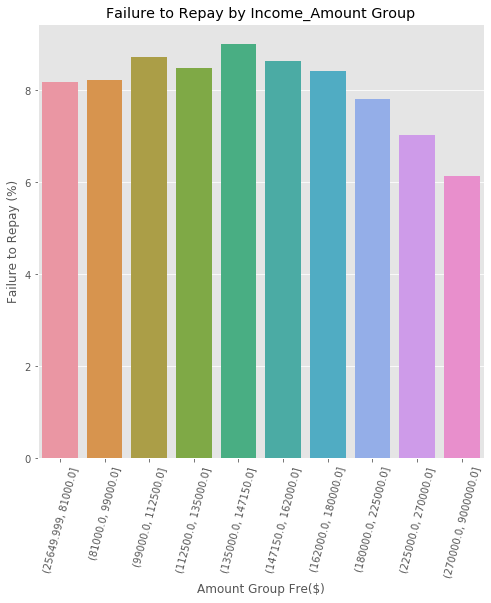

In [39]:
plt.figure(figsize = (8, 8))

# income_amount為 x, target 為 y 繪製 barplot

px = amount_groups_fre.index.astype(str)
py = 100* amount_groups_fre['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Amount Group Fre($)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Income_Amount Group');

In [40]:
'''Conclusion: 可以看到隨著無論是等頻或等寬劃分, Income_amountc和Target(貸款違約)的關係, 都會呈現先上升(也就是隨著收入越高, 貸款違約率越高), 到一個金額後下降(也就是隨著收入越高, 貸款違約率越低)的情形 '''

'Conclusion: 可以看到隨著無論是等頻或等寬劃分, Income_amountc和Target(貸款違約)的關係, 都會呈現先上升(也就是隨著收入越高, 貸款違約率越高), 到一個金額後下降(也就是隨著收入越高, 貸款違約率越低)的情形 '